# Imports

In [1]:
#importing libraries
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
#brown corpus is the corpus with the text data from all different categories
from nltk.corpus import brown
#wordnet: library with useful functions
from nltk.corpus import wordnet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#downloading brown corpus
nltk.download('brown')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\repon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\repon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\repon\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

# Activity 3

## 3.1 Sub-activity: Applying NLP operations on the corpus

### Task 1

In [2]:
#printing all categories in alphabetical order
print(brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


### Task 2

In [3]:
#creating a dataframe called brown_corpus
#important note: for some reason in my machine, the dataframe takes 10-15 seconds to load, please wait before proceeding
#with the  marking for this task.

#(a)
#definining the column names
cols = ['category_name', 'count_words', 'count_sentences', 'count_paragraphs', 'common_words']

#(b)
#defining empty list to populate data for the columns defined previously
words_data = []
for cat in brown.categories():
    #creating a frequency distribution, for every word, it will specify the count of that word in that specific category

    #this syntax is creating a list containing the frequency distribution for all the words in the category "cat"
    #store in word_dist
    word_dist = nltk.FreqDist(w.lower() for w in brown.words(categories=[cat]))
    #empty list is for common words: data from 
    comm_words = []
    #we want the count of the words appearing per category, this why len() function 
    #brown.paras has a list of paras in the category in question, in this loop we wish to obtain the length of this list

    #using the function most.common() which is built in to get a mode of the most occurring word 
    #i am using a for loop to get rid of the count, just the most occurring word as a separation technique, 
    #I am doing it using a single-liner for loop
    #t[0] is just to obtain the words, by iterating over it and just returning the words, not the count
    words_data.append([cat, len(brown.words(categories=[cat])), len(brown.sents(categories=[cat])), len(brown.paras(categories=[cat])), [t[0] for t in word_dist.most_common(10)]])

#populating the dataframe and we passing words_data    
brown_corpus = pd.DataFrame(words_data, columns = cols)

#(c)
#adding a sixth column
#stopwords: words that do not carry meaningful information:
#checking the stopwords based on nltk
stopwords = nltk.corpus.stopwords.words('english')

#here I am removing punctuations and stopwords
com_word_preprocess = []
#creating another frequency distribution
for cat in brown.categories():
    #oneliner syntax to add words to word_dist under the condition that it is an alphanumerical value and it is not a stopword
    #this is a short way to do a for loop with a if statement block
    #appending result into com_word_preprocess[]
    word_dist = nltk.FreqDist(w for w in brown.words(categories=[cat]) if w.isalpha() and w not in stopwords )
    #grabbing first words, not count from the tuples
    com_word_preprocess.append([t[0] for t in word_dist.most_common(10)])

#adding another column, the list we created is placed here, newly 
brown_corpus['common_words_after_preprocessing'] = com_word_preprocess

# (d)
brown_corpus.head(10)

,category_name,count_words,count_sentences,count_paragraphs,common_words,common_words_after_preprocessing
0,adventure,69342,4637,1387,"[., the, ,, and, a, of, to, he, ``, '']","[I, He, The, said, would, back, man, one, coul..."
1,belles_lettres,173096,7209,1405,"[the, ,, ., of, and, to, a, in, that, is]","[The, I, one, would, He, In, It, But, time, man]"
2,editorial,61604,2997,1003,"[the, ,, ., of, to, and, a, in, is, that]","[The, I, would, one, But, It, He, In, new, Ame..."
3,fiction,68488,4249,1043,"[the, ,, ., and, to, of, a, he, was, in]","[I, He, The, would, said, one, could, It, like..."
4,government,70117,3032,851,"[the, ,, of, ., and, to, in, a, for, is]","[The, year, States, United, may, In, would, ma..."
5,hobbies,82345,4193,1119,"[the, ,, ., of, and, a, to, in, is, for]","[The, one, I, This, may, It, time, A, two, In]"
6,humor,21695,1053,254,"[,, the, ., and, a, of, to, in, ``, '']","[I, The, said, one, would, He, It, time, even,..."
7,learned,181888,7734,1418,"[the, ,, of, ., and, in, to, a, is, that]","[The, Af, In, one, may, would, It, This, A, two]"
8,lore,110299,4881,1203,"[the, ,, ., of, and, to, a, in, is, that]","[The, one, I, In, would, It, time, may, first,..."
9,mystery,57169,3886,1164,"[., the, ,, to, and, a, he, of, was, ``]","[I, He, The, said, would, one, back, could, It..."


## 3.2 Sub-activity: Applying NLP operations on the corpus

### Task 3

In [4]:
# (a)
news_words = [w for w in brown.words(categories=['news']) if w.isalpha() and w not in stopwords]
#one-liner for loop with a if statement, if the condition in passed, then we add w into the list
#isalpha() checks if it is an alphabetical word or not
#stopwords are is, the are, she...

# (b)
print("Number of unique words before stemming is: ", len(set(news_words)))

# (c)
ps = nltk.stem.PorterStemmer()
#stemming is performed the PorterStemmer
news_words = [ps.stem(w) for w in news_words]
#stem function performs the stemming
print("Number of unique words after stemming is: ", len(set(news_words)))

Number of unique words before stemming is:  12263
Number of unique words after stemming is:  7816


### Task 4

In [5]:
# (a)
#repeating the same as task 3
fiction_words = [w for w in brown.words(categories=['fiction']) if w.isalpha() and w not in stopwords]

# (b)
print("Number of unique words before stemming is: ", len(set(fiction_words)))

# (c)
#different type of stepping provided by Snowball Stemmer
sb = nltk.stem.SnowballStemmer(language='english')
fiction_words = [sb.stem(w) for w in fiction_words]

print("Number of unique words after stemming is: ", len(set(fiction_words)))

Number of unique words before stemming is:  8612
Number of unique words after stemming is:  5886


### Task 5

In [7]:
# (a)
government_words = [w for w in brown.words(categories=['government']) if w.isalpha() and w not in stopwords]

# (b)
print("Number of unique words before stemming is: ", len(set(government_words)))

# (c)
lm = nltk.stem.WordNetLemmatizer()
#invoking the lm.lemmatize function on parameter w. 
government_words = [lm.lemmatize(w) for w in government_words]
print("Number of unique words after stemming is: ", len(set(government_words)))

#theoretical notes: 
#lematizer converts a word into another possible word which has the same meaning i.e. mice and mouse
#lemantization uses
#Stemming uses the stem of the word, while lemmatization uses the context in 
#which the word is being used
#stem means the root of the word

Number of unique words before stemming is:  7132
Number of unique words after stemming is:  6392


### Task 6

In [8]:
#synsets gives all the synonyms

# (b)
def get_synonyms(words_list):
    syn = []
    for word in words_list:
        for s in wordnet.synsets(word):
            for l in s.lemmas():
                syn.append(l.name())
                
    return list(set(syn))
    
#this extracts all the common words we have - this is a list of lists
target_words_list = brown_corpus['common_words_after_preprocessing'].values

synonyms = []
#this for loop will give usual individual lists
for words_list in target_words_list:
    #for each individual lists, get synonyms
    synonyms.append(get_synonyms(words_list))

#creating synonym column as per part (a)
brown_corpus['synonyms'] = synonyms

# (c)
#almost exactly the same for antonyms
def get_antonyms(words_list):
    ant = []
    for word in words_list:
        for s in wordnet.synsets(word):
            for l in s.lemmas():
                #check if l has an antonym or not
                if l.antonyms():
                    ant.append(l.antonyms()[0].name())
                    
    return list(set(ant))

antonyms = []
for words_list in target_words_list:
    antonyms.append(get_antonyms(words_list))

#creating antonym column as per part b
brown_corpus['antonyms'] = antonyms

# (d)
brown_corpus.head(10)

,category_name,count_words,count_sentences,count_paragraphs,common_words,common_words_after_preprocessing,synonyms,antonyms
0,adventure,69342,4637,1387,"[., the, ,, and, a, of, to, he, ``, '']","[I, He, The, said, would, back, man, one, coul...","[human_beings, second, dorsum, ace, unitary, a...","[veer, advance, forward, ahead, civilian, woma..."
1,belles_lettres,173096,7209,1405,"[the, ,, ., of, and, to, a, in, that, is]","[The, I, one, would, He, In, It, But, time, man]","[I, human_beings, man, simply, but, indium, ac...","[civilian, woman]"
2,editorial,61604,2997,1003,"[the, ,, ., of, to, and, a, in, is, that]","[The, I, would, one, But, It, He, In, new, Ame...","[I, simply, but, indium, fresh, new, ace, unit...","[worn, old]"
3,fiction,68488,4249,1043,"[the, ,, ., and, to, of, a, he, was, in]","[I, He, The, would, said, one, could, It, like...","[I, like, similar, the_likes_of, enjoin, same,...","[unalike, dislike, unlike]"
4,government,70117,3032,851,"[the, ,, of, ., and, to, in, a, for, is]","[The, year, States, United, may, In, would, ma...","[indium, earn, ace, unitary, Indiana, State_De...","[devolution, break, disunify, unmade, unmake, ..."
5,hobbies,82345,4193,1119,"[the, ,, ., of, and, a, to, in, is, for]","[The, one, I, This, may, It, time, A, two, In]","[I, deoxyadenosine_monophosphate, group_A, May...",[]
6,humor,21695,1053,254,"[,, the, ., and, a, of, to, in, ``, '']","[I, The, said, one, would, He, It, time, even,...","[I, like, still, evening, the_likes_of, enjoin...","[uneven, unlike, unalike, odd, dislike]"
7,learned,181888,7734,1418,"[the, ,, of, ., and, in, to, a, is, that]","[The, Af, In, one, may, would, It, This, A, two]","[I, deoxyadenosine_monophosphate, group_A, May...",[]
8,lore,110299,4881,1203,"[the, ,, ., of, and, to, a, in, is, that]","[The, one, I, In, would, It, time, may, first,...","[indium, ace, unitary, Indiana, clock_time, he...","[middle, second, last]"
9,mystery,57169,3886,1164,"[., the, ,, to, and, a, he, of, was, ``]","[I, He, The, said, would, one, back, could, It...","[second, dorsum, the_likes_of, ace, unitary, a...","[veer, advance, forward, ahead, unlike, unalik..."


### Task 7

In [9]:
#using simple slicing to find last 500 para list, using "-" means it slices backwards
all_paras = brown.paras()[-500:]

### Task 8

In [10]:
def get_bigrams_frequency(all_paras):
    #appending the correct sentences in filtered paras
    filtered_paras = []
    for sent in all_paras:
        filtered_sent = []
        for word in sent[0]:
            #this condition is checking if each word is in stopwords
            #and it will check if it is in the alphabet
            if word not in stopwords and word.isalpha():
                filtered_sent.append(word)
        filtered_paras.append(filtered_sent)

    bigram_list = []
    for sent in filtered_paras:
        bgram = list(nltk.bigrams(sent))
        bigram_list.extend(bgram)
        
    return nltk.FreqDist(bigram_list)

#if word is in alphabet, then append it 
#only once have a complete sentence, append to paras 

### Task 9

In [11]:
#saving the dictionary in a variable named brown_bigrams
brown_bigrams = get_bigrams_frequency(all_paras)

### Task 10

In [12]:
#print the 15 most frequently occurring bigrams of this dictionary
#achieve this by passing most_common
print(brown_bigrams.most_common(15))

[(('I', 'said'), 16), (('Phil', 'said'), 4), (('I', 'know'), 4), (('humor', 'comedy'), 4), (('Arlene', 'said'), 4), (('I', 'got'), 3), (('Frankie', 'said'), 3), (('New', 'York'), 3), (('Charlotte', 'said'), 3), (('Samuel', 'Burns'), 3), (('I', 'could'), 3), (('The', 'boy'), 3), (('Snakes', 'ugly'), 3), (('Hanford', 'College'), 3), (('Cady', 'felt'), 3)]


## 3.3 Sub-section: Visualisation

### Task 11

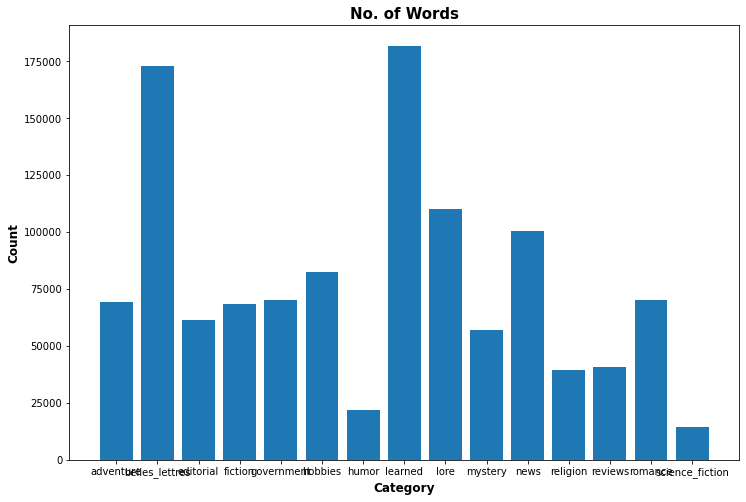

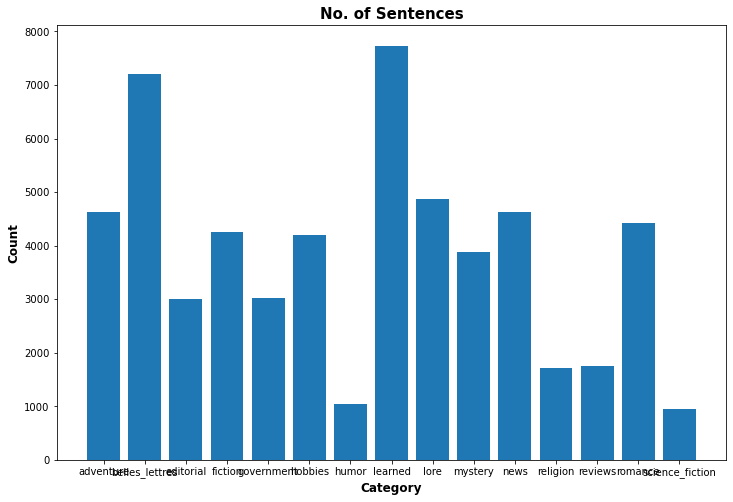

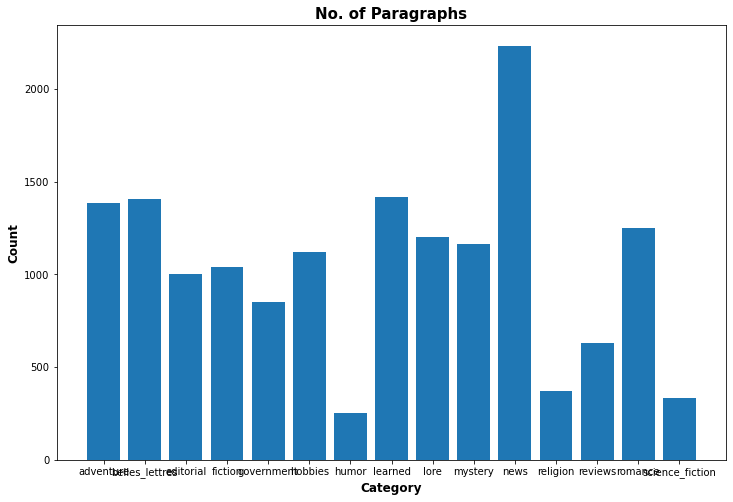

In [13]:
#creating three bar plots: num of words, num of sentences and num of paragraphs
#each block below corresponds to the plots mentioned in previous comment (using matplotlib again)

fig = plt.subplots(figsize =(12, 8))
plt.bar('category_name', 'count_words', data = brown_corpus)
plt.xlabel('Category', fontweight ='bold', fontsize = 12)
plt.ylabel('Count', fontweight ='bold', fontsize = 12)
# plt.xticks(brown_corpus['category_name'], rotation='vertical')
plt.title('No. of Words', fontweight ='bold', fontsize = 15)
plt.show()

fig = plt.subplots(figsize =(12, 8))
plt.bar('category_name', 'count_sentences', data = brown_corpus)
plt.xlabel('Category', fontweight ='bold', fontsize = 12)
plt.ylabel('Count', fontweight ='bold', fontsize = 12)
# plt.xticks(brown_corpus['category_name'], rotation='vertical')
plt.title('No. of Sentences', fontweight ='bold', fontsize = 15)
plt.show()

fig = plt.subplots(figsize =(12, 8))
plt.bar('category_name', 'count_paragraphs', data = brown_corpus)
plt.xlabel('Category', fontweight ='bold', fontsize = 12)
plt.ylabel('Count', fontweight ='bold', fontsize = 12)
# plt.xticks(brown_corpus['category_name'], rotation='vertical')
plt.title('No. of Paragraphs', fontweight ='bold', fontsize = 15)

plt.show()

### Task 12

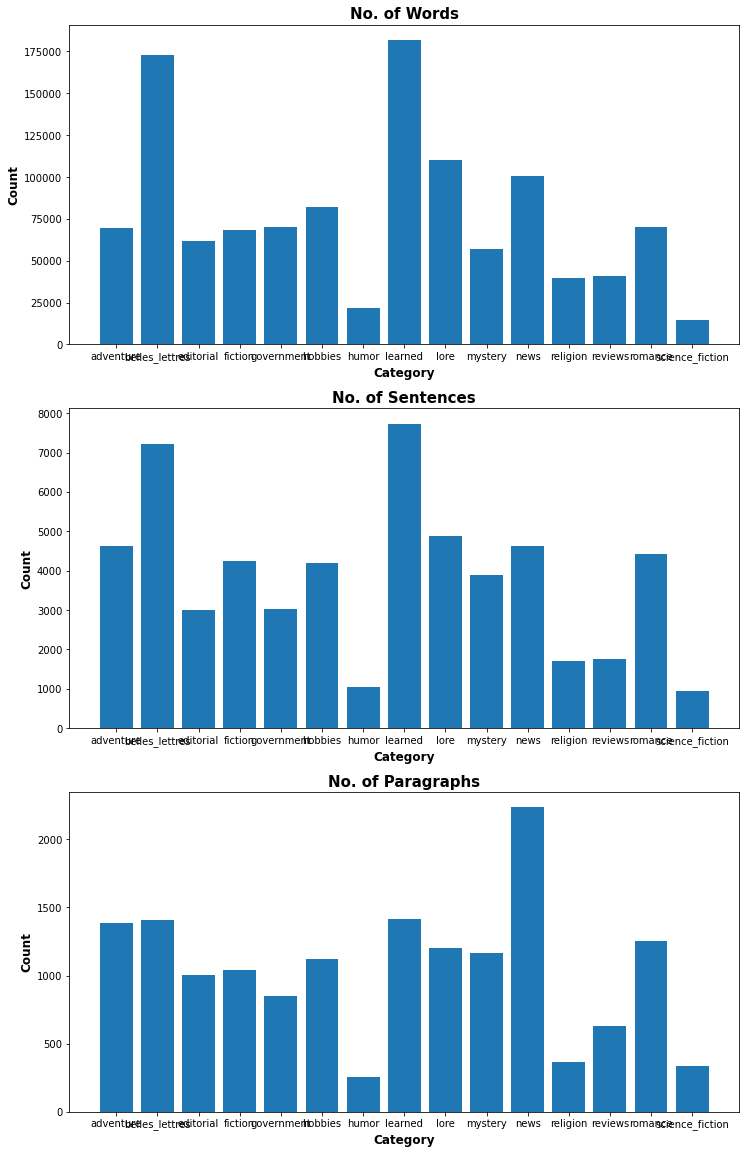

In [15]:
%matplotlib inline

#same as before, transforming so that three plots appear as one figure.
fig = plt.subplots(figsize =(12, 20))
plt.subplot(3, 1, 1)
plt.bar('category_name', 'count_words', data = brown_corpus)
plt.xlabel('Category', fontweight ='bold', fontsize = 12)
plt.ylabel('Count', fontweight ='bold', fontsize = 12)
plt.xticks(brown_corpus['category_name'])
plt.title('No. of Words', fontweight ='bold', fontsize = 15)

plt.subplot(3, 1, 2)
plt.bar('category_name', 'count_sentences', data = brown_corpus)
plt.xlabel('Category', fontweight ='bold', fontsize = 12)
plt.ylabel('Count', fontweight ='bold', fontsize = 12)
plt.xticks(brown_corpus['category_name'])
plt.title('No. of Sentences', fontweight ='bold', fontsize = 15)

plt.subplot(3, 1, 3)
plt.bar('category_name', 'count_paragraphs', data = brown_corpus)
plt.xlabel('Category', fontweight ='bold', fontsize = 12)
plt.ylabel('Count', fontweight ='bold', fontsize = 12)
plt.xticks(brown_corpus['category_name'])
plt.title('No. of Paragraphs', fontweight ='bold', fontsize = 15)

plt.savefig('myfig.png')
plt.show()

### Task 13

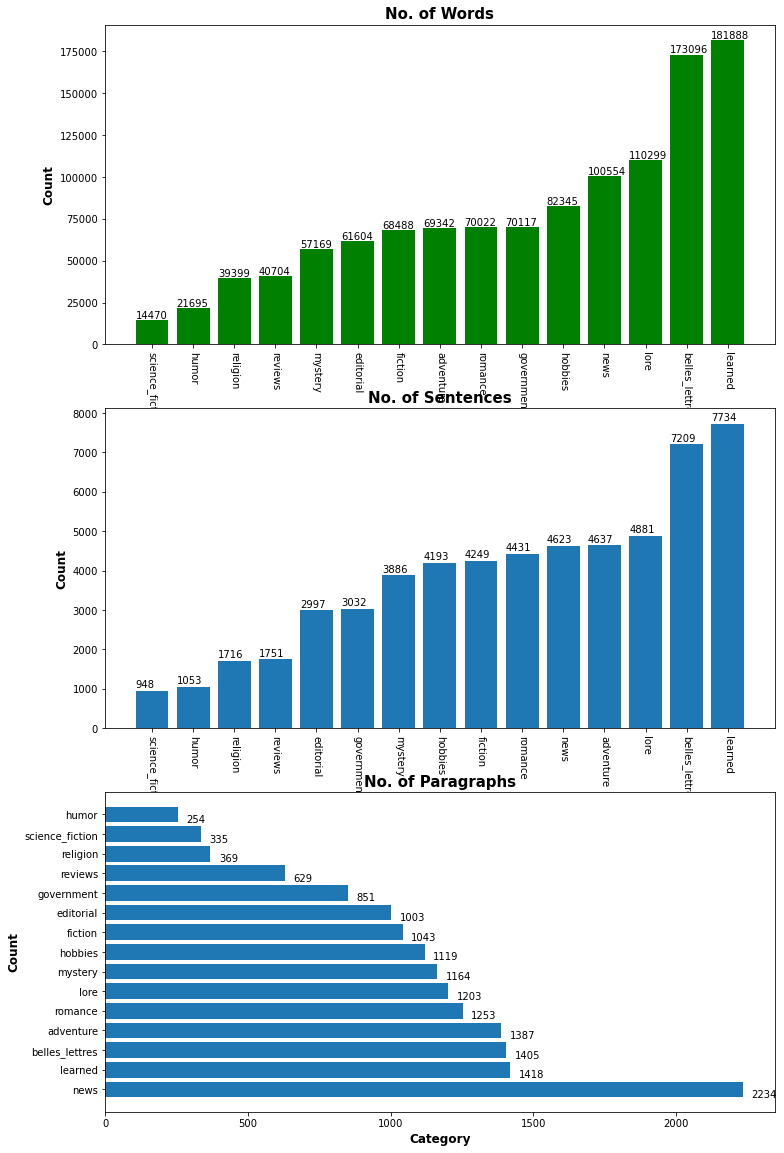

In [14]:
'''
applying changes: 
 - color: green
 - adjust x axes, rotate 90 deg 
 - include exact count of words on top 
 - order the bars in ascending order 
 - replace the 3rd bar plot
 - print again
 
'''
fig = plt.subplots(figsize =(12, 20))
plt.subplot(3, 1, 1)
plt.bar('category_name', 'count_words', data = brown_corpus.sort_values('count_words'), color='g')
plt.xlabel('Category', fontweight ='bold', fontsize = 12)
plt.ylabel('Count', fontweight ='bold', fontsize = 12)
plt.xticks(brown_corpus['category_name'], rotation=-90)
plt.title('No. of Words', fontweight ='bold', fontsize = 15)

for index, value in enumerate(brown_corpus['count_words'].sort_values()):
    plt.text(index-0.4, value+1000, str(value))

plt.subplot(3, 1, 2)
plt.bar('category_name', 'count_sentences', data = brown_corpus.sort_values('count_sentences'))
plt.xlabel('Category', fontweight ='bold', fontsize = 12)
plt.ylabel('Count', fontweight ='bold', fontsize = 12)
plt.xticks(brown_corpus['category_name'], rotation=-90)
plt.title('No. of Sentences', fontweight ='bold', fontsize = 15)

for index, value in enumerate(brown_corpus['count_sentences'].sort_values()):
    plt.text(index-0.4, value+80, str(value))
    
plt.subplot(3, 1, 3)
plt.barh('category_name', 'count_paragraphs', data = brown_corpus.sort_values('count_paragraphs', ascending = False))
plt.xlabel('Category', fontweight ='bold', fontsize = 12)
plt.ylabel('Count', fontweight ='bold', fontsize = 12)
plt.yticks(brown_corpus['category_name'])
plt.title('No. of Paragraphs', fontweight ='bold', fontsize = 15)

for index, value in enumerate(brown_corpus['count_paragraphs'].sort_values(ascending = False)):
    plt.text(value+30, index-0.4, str(value))
    
plt.savefig('myfig.png')
plt.show()

### Task 14

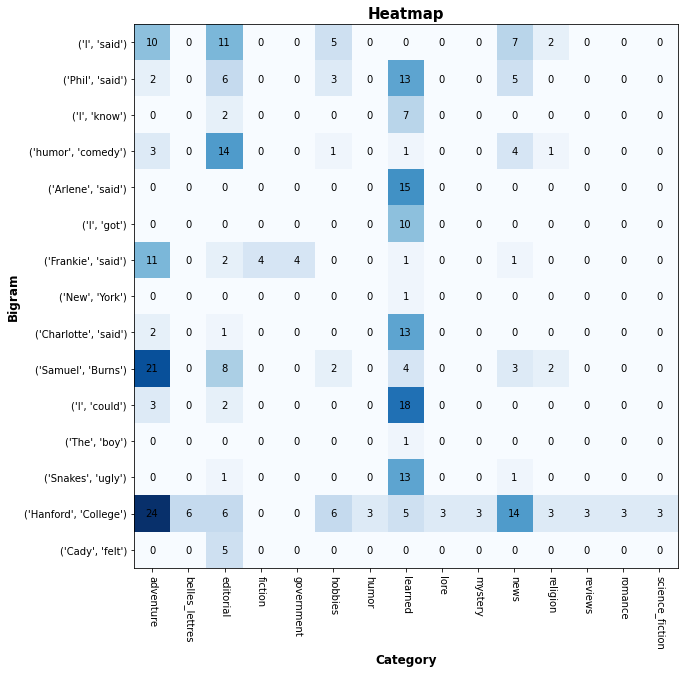

In [16]:
map_data = []
#for loop for all the categories, extracting the paras
#for each para we are creating a bigram 
#we are storing the results in bi_cat (bigram per category)
for cat in brown.categories():
    bi_cat = get_bigrams_frequency(brown.paras(categories=[cat]))
    cat_data = []
    #this for loop caputuring the first 15 most occurring bigram
    for bigrm in brown_bigrams.most_common(15):
        #it is extracting the count most common occurring bigram per category
        #storing the frequency or count of 15 most occurring bigrams in a 
        #specific category
        cat_data.append(bi_cat[bigrm[0]])
    #storing the data that will compose the map, hold the values of the map
    map_data.append(cat_data)

#visualisation code
fig = plt.subplots(figsize =(10, 10))
plt.imshow(map_data, cmap='Blues')
plt.xticks(np.arange(15), brown.categories(), rotation = -90)
plt.yticks(np.arange(15), [i[0] for i in brown_bigrams.most_common(15)])

#for loop about printing what we have in the map data
for i in range(len(brown.categories())):
    for j in range(len(brown_bigrams.most_common(15))):
        #specifying the position of the map data
        #the data here is 2D, therefore we are feeding the data using i and j
        plt.text(j, i, map_data[i][j],
                       ha="center", va="center", color='k')

plt.xlabel('Category', fontweight ='bold', fontsize = 12)
plt.ylabel('Bigram', fontweight ='bold', fontsize = 12)
plt.title('Heatmap', fontweight ='bold', fontsize = 15)
plt.show()